**K-State Honor Code "On my honor, as a student, I have neither given nor received unauthorized aid on this ascademic work"**

# 1. Guiding Exploration Questions

a. First Question:What  is the most popular words in the reveiws of Denver Botanic Gardens? What does the Word Cloud look like?


In [2]:
#Libraries
import time
import pandas as pd   
from bs4 import BeautifulSoup
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support.ui import WebDriverWait as wait
from selenium.common.exceptions import NoSuchElementException
import re
import nltk
from nltk.corpus import stopwords
from nltk import FreqDist, word_tokenize
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [3]:
#Get Chrome driver
driver = webdriver.Chrome(ChromeDriverManager().install())

[WDM] - Downloading: 100%|██████████| 6.46M/6.46M [00:00<00:00, 15.2MB/s]
C:\Users\yutow\AppData\Local\Temp\ipykernel_10132\479641510.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


In [4]:
links = [] #create an empty list for collecting all the project urls

#start with pagination
# for 4 pages:
#from the begining number: 0 to the end number: 1010, add 10 each iteration
for i in range(10,2010,10):
    urls = "https://www.tripadvisor.com/Attraction_Review-g33388-d144226-Reviews-or"+ str(i) + "-Denver_Botanic_Gardens-Denver_Colorado.html"
    page = driver.get(urls)
    driver.implicitly_wait(10) #driver sleep for 10 seconds

    for i in driver.find_elements("xpath",'//*[@id="tab-data-qa-reviews-0"]/div/div[5]/div[1]/span/div/div[3]/a'): #find each job's url
        link = i.get_attribute('href')
        links += [link] # add the urls (links) one by one to the links list
print (len(links))

200


In [5]:
#initialize dictionary with lists
review_info = {'CustomerName':[],'PostDate':[],'ReviewText':[], 'LikeCount':[], 'Title':[]}

# open project one by one (open each link)
for i in links:
    driver.get(i)
    time.sleep(10)
    
    try:
        customer_name = driver.find_element("xpath",'/html/body/div[2]/div[2]/div[1]/div[1]/div/div[2]/div/div/div/div[1]/div/div/div/div[1]/div/div/div[1]/div[2]/div').text.strip()
    except NoSuchElementException:
        customer_name = 0
    
    try:
        
        post_date = driver.find_element("xpath",'/html/body/div[2]/div[2]/div[1]/div[1]/div/div[2]/div/div/div/div[1]/div/div/div/div[2]/span[2]').text.strip()
    except NoSuchElementException:
        post_date = 0
    
    try:
        review_text = driver.find_element("xpath",'/html/body/div[2]/div[2]/div[1]/div[1]/div/div[2]/div/div/div/div[1]/div/div/div/div[2]/div[3]/div/p/span').text.strip()
    except NoSuchElementException:
        review_text = 0     

    try:
        like_count = driver.find_element("xpath",'/html/body/div[1]/main/div[1]/div[2]/div[2]/div[2]/div/span/section[8]/div/div/span/section/section/div[1]/div/div[5]/div[1]/span/div/div[1]/div[2]/button/span').text.strip()
    except NoSuchElementException:
        like_count = 0  
        
    try:
        Title = driver.find_element("xpath",'/html/body/div[1]/main/div[1]/div[2]/div[2]/div[2]/div/span/section[8]/div/div/span/section/section/div[1]/div/div[5]/div[1]/span/div/div[3]/a/span').text.strip()
    except NoSuchElementException:
        Title = 0  

      
   
    review_info['CustomerName'].append(customer_name) 
    review_info['PostDate'].append(post_date)
    review_info['ReviewText'].append(review_text)
    review_info['LikeCount'].append(like_count)
    review_info['Title'].append(Title)
          
driver.close()

In [6]:
reviews = pd.DataFrame(review_info)
reviews.head()

,CustomerName,PostDate,ReviewText,LikeCount,Title
0,bspin23,"Reviewed August 24, 2022",I went here years ago when it first opened. So...,0,0
1,Gardengirl5912020,"Reviewed August 4, 2022",The gardens are laid out beautifully and well ...,0,0
2,travelsols,"Reviewed July 9, 2022",This garden was on my bucket list and I was no...,0,0
3,Chris W,"Reviewed June 8, 2022",Beautiful gardens with well paved walking path...,0,0
4,JP-Local919,"Reviewed January 11, 2022",Had a great time exploring the gardens! There ...,0,0


In [7]:
reviews["ReviewText"] = reviews["ReviewText"].str.replace(r'https?://[^\s<>"]+|www\.[^\s<>"]+', "")
reviews["ReviewText"] = reviews["ReviewText"].str.replace(r'[^a-zA-Z0-9]+', ' ')
reviews["ReviewText"] = reviews["ReviewText"].str.replace('@#', '')
reviews["ReviewText"] = reviews["ReviewText"].str.replace("\n", '')

C:\Users\yutow\AppData\Local\Temp\ipykernel_10132\2303688816.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  reviews["ReviewText"] = reviews["ReviewText"].str.replace(r'https?://[^\s<>"]+|www\.[^\s<>"]+', "")
C:\Users\yutow\AppData\Local\Temp\ipykernel_10132\2303688816.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  reviews["ReviewText"] = reviews["ReviewText"].str.replace(r'[^a-zA-Z0-9]+', ' ')


In [8]:
reviews["ReviewText"] = reviews["ReviewText"].str.lower()
reviews.head()

,CustomerName,PostDate,ReviewText,LikeCount,Title
0,bspin23,"Reviewed August 24, 2022",i went here years ago when it first opened so ...,0,0
1,Gardengirl5912020,"Reviewed August 4, 2022",the gardens are laid out beautifully and well ...,0,0
2,travelsols,"Reviewed July 9, 2022",this garden was on my bucket list and i was no...,0,0
3,Chris W,"Reviewed June 8, 2022",beautiful gardens with well paved walking path...,0,0
4,JP-Local919,"Reviewed January 11, 2022",had a great time exploring the gardens there w...,0,0


In [9]:
reviews["ReviewText"].apply(word_tokenize)

0      [i, went, here, years, ago, when, it, first, o...
1      [the, gardens, are, laid, out, beautifully, an...
2      [this, garden, was, on, my, bucket, list, and,...
3      [beautiful, gardens, with, well, paved, walkin...
4      [had, a, great, time, exploring, the, gardens,...
                             ...                        
195    [the, gardens, have, something, to, offer, all...
196    [the, gardens, are, probably, very, nice, in, ...
197    [my, girlfriend, and, i, had, so, much, fun, h...
198    [we, came, here, in, winter, and, everything, ...
199    [it, was, a, magical, night, with, all, the, b...
Name: ReviewText, Length: 200, dtype: object

In [14]:
#tokenization or word split
more_stopwords = set(('cant', 'aint', 'today', 'food', 'got', 'movie', 'one', 'like', 'could', 'see', 'also', 
'get', 'zoo', 'animal', 'animals', 'louis', 'many', 'denver', 'garden', 'gardens'))
extra_stoplist = set(stopwords.words('english')) | more_stopwords
#Remove stopwords
# tokens = (word for word in tokens if word not in extra_stoplist)
# # Filter non-alphanumeric characters from tokens
# tokens = (word for word in tokens if word.isalpha())
# #remove short words
# tokens = (word for word in tokens if len(word) >= 3)

reviews["ReviewText"] = reviews["ReviewText"].apply(lambda x: ' '.join([word for word in x.split() if word not in extra_stoplist]))
reviews.head()

,CustomerName,PostDate,ReviewText,LikeCount,Title
0,bspin23,"Reviewed August 24, 2022",went years ago first opened much changed since...,0,0
1,Gardengirl5912020,"Reviewed August 4, 2022",laid beautifully well cared nice variety style...,0,0
2,travelsols,"Reviewed July 9, 2022",bucket list disappointed way laid sections cha...,0,0
3,Chris W,"Reviewed June 8, 2022",beautiful well paved walking paths native plan...,0,0
4,JP-Local919,"Reviewed January 11, 2022",great time exploring definitely recommend wear...,0,0


In [13]:
#Displaying top 10 words
reviews.ReviewText.str.split(expand=True).stack().value_counts()[:10]

beautiful    78
great        70
well         63
plants       62
time         55
place        54
visit        50
many         47
botanical    40
nice         40
dtype: int64

(-0.5, 399.5, 199.5, -0.5)

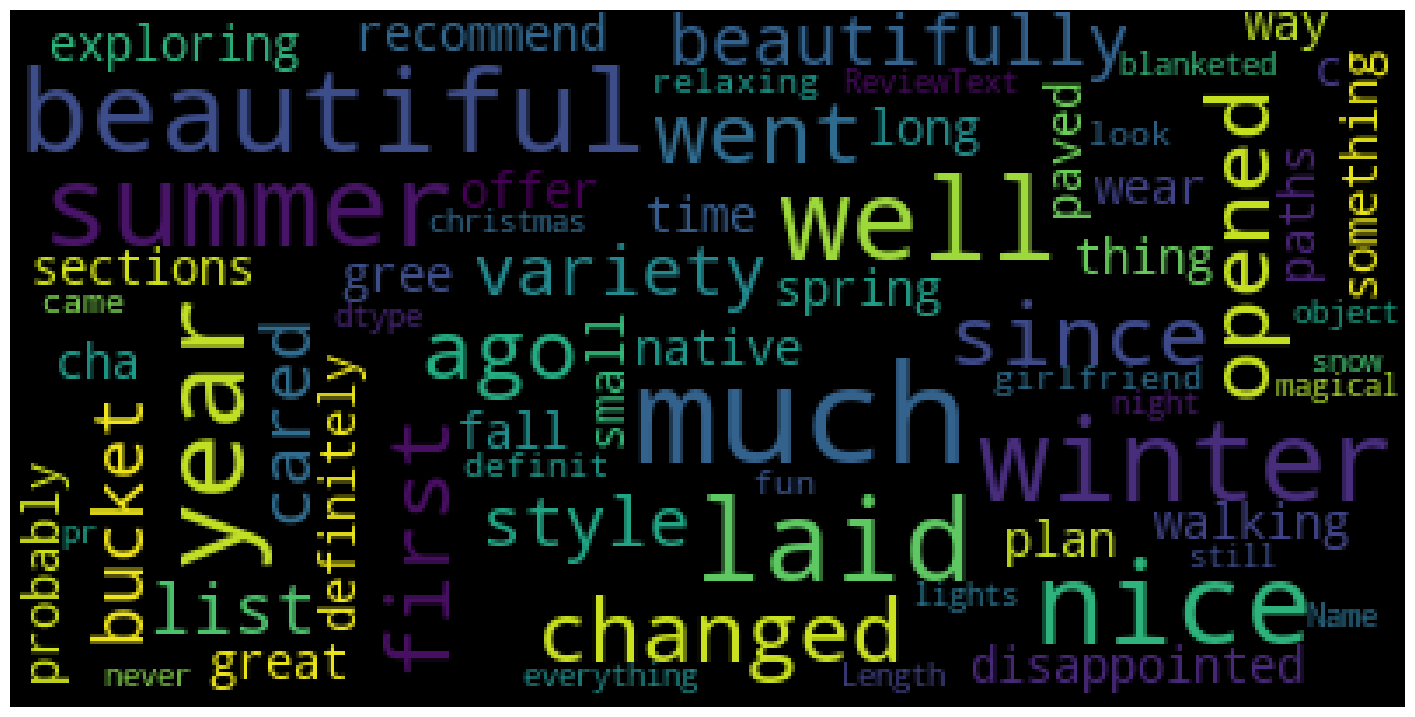

In [15]:
wordcloud = WordCloud(max_font_size=40, relative_scaling=.5, stopwords=extra_stoplist).generate(str(reviews["ReviewText"]))
plt.figure(figsize=(18,18))
plt.imshow(wordcloud)
plt.axis("off")